<a href="https://colab.research.google.com/github/renzo-plasencia/alura-latam-reto/blob/main/Challenge_Alura_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importación de datos



In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
def sumarDf(df: pd.DataFrame) -> float:
    return df['Precio'].sum()

In [ ]:
tienda_suma = sumarDf(tienda)
tienda_suma_2 = sumarDf(tienda2)
tienda_suma_3 = sumarDf(tienda3)
tienda_suma_4 = sumarDf(tienda4)

In [ ]:
print(f"Ventas la tienda 1: {tienda_suma:,.0f}\nVentas la tienda 2: {tienda_suma_2:,.0f}\nVentas la tienda 3: {tienda_suma_3:,.0f}\nVentas la tienda 4: {tienda_suma_4:,.0f}")

Ventas la tienda 1: 1,150,880,400
Ventas la tienda 2: 1,116,343,500
Ventas la tienda 3: 1,098,019,600
Ventas la tienda 4: 1,038,375,700


# 2. Ventas por categoría

In [ ]:
def agruparProductoVentas (df: pd.DataFrame, tienda:str) -> None:
    # Agrupar por producto y sumar el # de ventas
    ventas_categoria = df.groupby('Categoría del Producto')['Producto'].count().reset_index(name='Cantidad de Ventas')
    # Ordenarlos de mayor a menor
    ventas_categoria = ventas_categoria.sort_values(['Cantidad de Ventas'], ascending=False)
    top_3 = ventas_categoria.head(3).values.tolist()
    # Imprimir top 3
    print(f'{tienda}:')
    print(f'1. {top_3[0][0]}: {top_3[0][1]} unidades\n2. {top_3[1][0]}: {top_3[1][1]} unidades\n3. {top_3[2][0]}: {top_3[2][1]} unidades\n')

In [ ]:
print("Productos más vendidos por Tiendas:")
agruparProductoVentas(tienda,'Tienda 1')
agruparProductoVentas(tienda2,'Tienda 2')
agruparProductoVentas(tienda3,'Tienda 3')
agruparProductoVentas(tienda4,'Tienda 4')

Productos más vendidos por Tiendas:
Tienda 1:
1. Muebles: 465 unidades
2. Electrónicos: 448 unidades
3. Juguetes: 324 unidades

Tienda 2:
1. Muebles: 442 unidades
2. Electrónicos: 422 unidades
3. Juguetes: 313 unidades

Tienda 3:
1. Muebles: 499 unidades
2. Electrónicos: 451 unidades
3. Juguetes: 315 unidades

Tienda 4:
1. Muebles: 480 unidades
2. Electrónicos: 451 unidades
3. Juguetes: 338 unidades



# 3. Calificación promedio de la tienda


In [ ]:
calificacion = round(float(tienda['Calificación'].mean()),2)
calificacion_2 = round(float(tienda2['Calificación'].mean()),2)
calificacion_3 = round(float(tienda2['Calificación'].mean()),2)
calificacion_4 = round(float(tienda2['Calificación'].mean()),2)

In [ ]:
print(f"La calificación promedio por tienda fue:\nTienda 1:{calificacion}\nTienda 2:{calificacion_2}\nTienda 3:{calificacion_3}\nTienda 4:{calificacion_4}")

La calificación promedio por tienda fue:
Tienda 1:3.98
Tienda 2:4.04
Tienda 3:4.04
Tienda 4:4.04


# 4. Productos más y menos vendidos

In [ ]:
def agruparProductoVentas (df: pd.DataFrame, tienda:str) -> None:
    # Agrupar por producto y sumar el # de ventas
    ventas_categoria = df.groupby('Producto')['Producto'].count().reset_index(name='Cantidad de Productos')
    # Ordenarlos de mayor a menor
    ventas_categoria = ventas_categoria.sort_values(['Cantidad de Productos'],ascending =False).reset_index(drop=True)
    top_3 = ventas_categoria.head(3).values.tolist()
    bottom_3 = ventas_categoria.tail(3).values.tolist()
    # Imprimir top 3
    print(f'{tienda}:')
    print(f'Los más vendidos fueron:')
    print(f'1. {top_3[0][0]}: {top_3[0][1]} unidades\n2. {top_3[1][0]}: {top_3[1][1]} unidades\n3. {top_3[2][0]}: {top_3[2][1]} unidades\n')
    print(f'Los menos vendidos fueron:')
    print(f'1. {bottom_3[0][0]}: {bottom_3[0][1]} unidades\n2. {bottom_3[1][0]}: {bottom_3[1][1]} unidades\n3. {bottom_3[2][0]}: {bottom_3[2][1]} unidades\n')

In [ ]:
agruparProductoVentas(tienda,'Tienda 1')
agruparProductoVentas(tienda2,'Tienda 2')
agruparProductoVentas(tienda3,'Tienda 3')
agruparProductoVentas(tienda4,'Tienda 4')

Tienda 1:
Los más vendidos fueron:
1. Armario: 60 unidades
2. TV LED UHD 4K: 60 unidades
3. Microondas: 60 unidades

Los menos vendidos fueron:
1. Olla de presión: 35 unidades
2. Celular ABXY: 33 unidades
3. Auriculares con micrófono: 33 unidades

Tienda 2:
Los más vendidos fueron:
1. Iniciando en programación: 65 unidades
2. Microondas: 62 unidades
3. Batería: 61 unidades

Los menos vendidos fueron:
1. Impresora: 34 unidades
2. Mesa de comedor: 34 unidades
3. Juego de mesa: 32 unidades

Tienda 3:
Los más vendidos fueron:
1. Kit de bancas: 57 unidades
2. Mesa de comedor: 56 unidades
3. Cama king: 56 unidades

Los menos vendidos fueron:
1. Microondas: 36 unidades
2. Set de vasos: 36 unidades
3. Bloques de construcción: 35 unidades

Tienda 4:
Los más vendidos fueron:
1. Cama box: 62 unidades
2. Cubertería: 59 unidades
3. Cama king: 56 unidades

Los menos vendidos fueron:
1. Guitarra acústica: 37 unidades
2. Armario: 34 unidades
3. Guitarra eléctrica: 33 unidades



# 5. Envío promedio por tienda

In [ ]:
def meanStore(tienda: pd.DataFrame) -> float:
    try:
        suma = tienda['Costo de envío'].sum()
        promedio_tienda = round(suma / len(tienda),2)

        return promedio_tienda
    except NameError as n:
        print("Error en el nombre del DF")
        return 0.0
    except Exception as e:
        print(f"Error: {e}")
        return 0.0

In [ ]:
envio_prom_tienda = meanStore(tienda)
envio_prom_tienda2 = meanStore(tienda2)
envio_prom_tienda3 = meanStore(tienda3)
envio_prom_tienda4 = meanStore(tienda4)

print(f"El promedio de costo de envio en la tienda 1 es: {envio_prom_tienda:,.0f}")
print(f"El promedio de costo de envio en la tienda 2 es: {envio_prom_tienda2:,.0f}")
print(f"El promedio de costo de envio en la tienda 3 es: {envio_prom_tienda3:,.0f}")
print(f"El promedio de costo de envio en la tienda 4 es: {envio_prom_tienda4:,.0f}")

El promedio de costo de envio en la tienda 1 es: 26,019
El promedio de costo de envio en la tienda 2 es: 25,216
El promedio de costo de envio en la tienda 3 es: 24,806
El promedio de costo de envio en la tienda 4 es: 23,459


# Gráficos

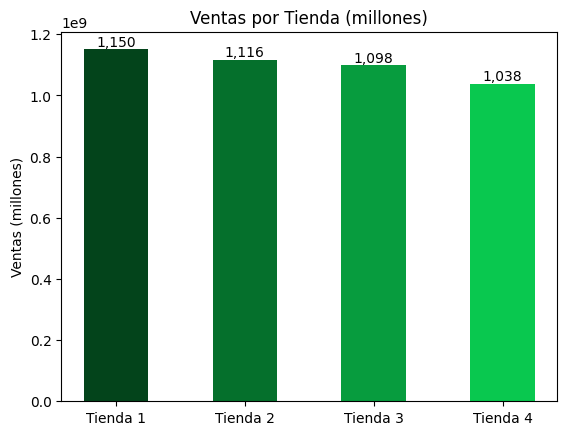

In [ ]:
import matplotlib.pyplot as plt

# Pie: Ventas por tienda
tienda_suma = sumarDf(tienda)
tienda_suma_2 = sumarDf(tienda2)
tienda_suma_3 = sumarDf(tienda3)
tienda_suma_4 = sumarDf(tienda4)

labels = ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']
ventas_tienda = [float(tienda_suma),float(tienda_suma_2),float(tienda_suma_3),float(tienda_suma_4)]

dic = {
    'ventas_tienda': ventas_tienda,
    'labels': labels
}

pie_chart = pd.DataFrame(dic)

bars = plt.bar(pie_chart.labels,pie_chart.ventas_tienda,width=0.5, color = ['#03441B','#05702C','#079C3E','#09C84F'])
labels_formateadas = [f"{int(valor/1000000):,}" for valor in pie_chart.ventas_tienda]
plt.bar_label(bars,labels=labels_formateadas)
plt.title("Ventas por Tienda (millones)")
plt.ylabel("Ventas (millones)")
plt.show()


# Ventas la tienda 1: 1,150,880,400
# Ventas la tienda 2: 1,116,343,500
# Ventas la tienda 3: 1,098,019,600
# Ventas la tienda 4: 1,038,375,700

In [ ]:

# Barras Horizonaltes: Calificación

# Columnas: Costo de envío

# Barras Horizontales: los productos más vendidos

# Análisis de la tiendas Alura Store:

## Ingresos Totales por Tienda
- Ventas la tienda 1: 1,150,880,400
- Ventas la tienda 2: 1,116,343,500
- Ventas la tienda 3: 1,098,019,600
- Ventas la tienda 4: 1,038,375,700 **(✅ menos ingresos totales)**

## Costo de Envío Promedio
- El promedio de costo de envio en la tienda 1 es: 26,019 **(✅ mayor costo de envío)**
- El promedio de costo de envio en la tienda 2 es: 25,216
- El promedio de costo de envio en la tienda 3 es: 24,806
- El promedio de costo de envio en la tienda 4 es: 23,459

## Calificación promedio de los clientes
La calificación promedio por tienda fue:
- Tienda 1:3.98 **(✅ menor calificación)**
- Tienda 2:4.04
- Tienda 3:4.04
- Tienda 4:4.04